In [82]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [83]:
from platform import python_version
python_version()

'3.7.9'

In [84]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import axes3d  

from matplotlib.colors import ListedColormap

In [85]:
guid_id_vals = [11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26, 31, 32, 33, 34, 35, 36]
guid_id_color_mapping = {
    11: "#1f77b4", 12: "#ff7f0e", 13: "#2ca02c", 14: "#d62728", 15: "#9467bd",
    20: "#8c564b", 21: "#e377c2", 22: "#7f7f7f", 23: "#bcbd22", 24: "#17becf",
    25: "#aec7e8", 26: "#ffbb78", 31: "#98df8a", 32: "#ff9896", 33: "#c5b0d5",
    34: "#c49c94", 35: "#f7b6d2", 36: "#c7c7c7"
}

colors = [guid_id_color_mapping[val] for val in guid_id_vals]

# Create a ListedColormap using the defined colors
guid_id_cmap = ListedColormap(colors)



In [86]:
data = pd.read_csv('ops3_log.csv')


data['time'] = data['loop_dt'].cumsum()

data.head()

,guid_id,loop_dt,rwy_alt,vel,surfv,mach,hdot,lat,long,range,...,nz,drag,eow,prog_pch,prog_roll,prog_yaw,flap_defl,spdbk_defl,Unnamed: 19,time
0,11,0.60,116873.653794,7856.546797,7856.546797,20.037149,-178.382979,31.001396,173.312087,6305.016418,...,0.000277,0.037262,9.796143e+06,37.182906,-0.012358,-0.134982,0.0,0.0,NaN,0.60
1,11,0.62,116763.013816,7856.687611,7856.687611,20.079065,-178.377822,31.022304,173.355101,6300.474069,...,0.000298,0.039242,9.796135e+06,38.781529,-0.611197,0.365438,0.0,0.0,NaN,1.22
2,11,0.62,116652.392947,7856.826155,7856.826155,20.120051,-178.368617,31.042543,173.396791,6295.931567,...,0.000308,0.040132,9.796123e+06,39.641575,-0.862512,0.605293,0.0,0.0,NaN,1.84
3,11,0.62,116541.791301,7856.956659,7856.956659,20.161379,-178.350985,31.062769,173.438502,6291.388909,...,0.000316,0.040909,9.796090e+06,40.202277,-0.970484,0.726950,0.0,0.0,NaN,2.46
4,11,0.62,116431.209291,7857.081012,7857.081012,20.203051,-178.327917,31.082979,173.480233,6286.846103,...,0.000323,0.041573,9.796042e+06,40.577749,-0.993021,0.772004,0.0,0.0,NaN,3.08


In [87]:
def angle360(angle):
    out = angle

    while (out >= 360):
        out -= 360
    while (out < 0):
        out += 360
    return out

def angle180(angle):
    out = angle

    while (out >= 180):
        out -= 360
    while (out < -180):
        out += 360
    return out

In [88]:
import plotly.graph_objects as go
from math import log2, radians, cos, sqrt


# Create a Scattermapbox trace with colors based on 'alt' column
trace = go.Scattergeo(
    mode='lines+markers',
    lon=data['long'],
    lat=data['lat'],
    line=dict(width=1, color='black'),
    marker=dict(
        size=6,
        color=data['rwy_alt'],
        colorscale='Viridis',  # Choose the colorscale you prefer
        cmin=data['rwy_alt'].min(),
        cmax=data['rwy_alt'].max(),
        colorbar=dict(title='Altitude')
    ),
    hovertemplate='Latitude: %{lat:.4f}<br>Longitude: %{lon:.4f}<br>Altitude: %{text}<br>Az err: %{customdata}<extra></extra>',
    text=data['rwy_alt'],
    customdata=data['delaz']
)

long360 = data['long'].apply(lambda l: angle360(l)).to_numpy()

center_lat = (data['lat'].min() + data['lat'].max()) / 2
center_lon = angle180((long360.min() + long360.max()) / 2)

print(center_lat, center_lon)


# Create the layout for the 3D globe view
layout = go.Layout(
    title_text='3D Globe View',
    showlegend=False,
    geo=dict(
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showcountries=True,
        showocean=True,
        lonaxis_gridcolor='rgb(102, 102, 102)',
        lataxis_gridcolor='rgb(102, 102, 102)',
        oceancolor='rgb(204, 230, 255)',
        showcoastlines=True,
        coastlinecolor='rgb(204, 204, 204)',
        showframe=True,
    
        center=dict(lat=center_lat, lon=center_lon),
        projection=dict(type='orthographic', rotation=dict(lon=center_lon, lat=center_lat, roll=0)),
        
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

fig.update_layout(
    autosize=False,
    width=800,
    height=800,)

35.4973475192006 -152.20252726969102


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Altitude (km)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Speed (m/s)')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'delaz')

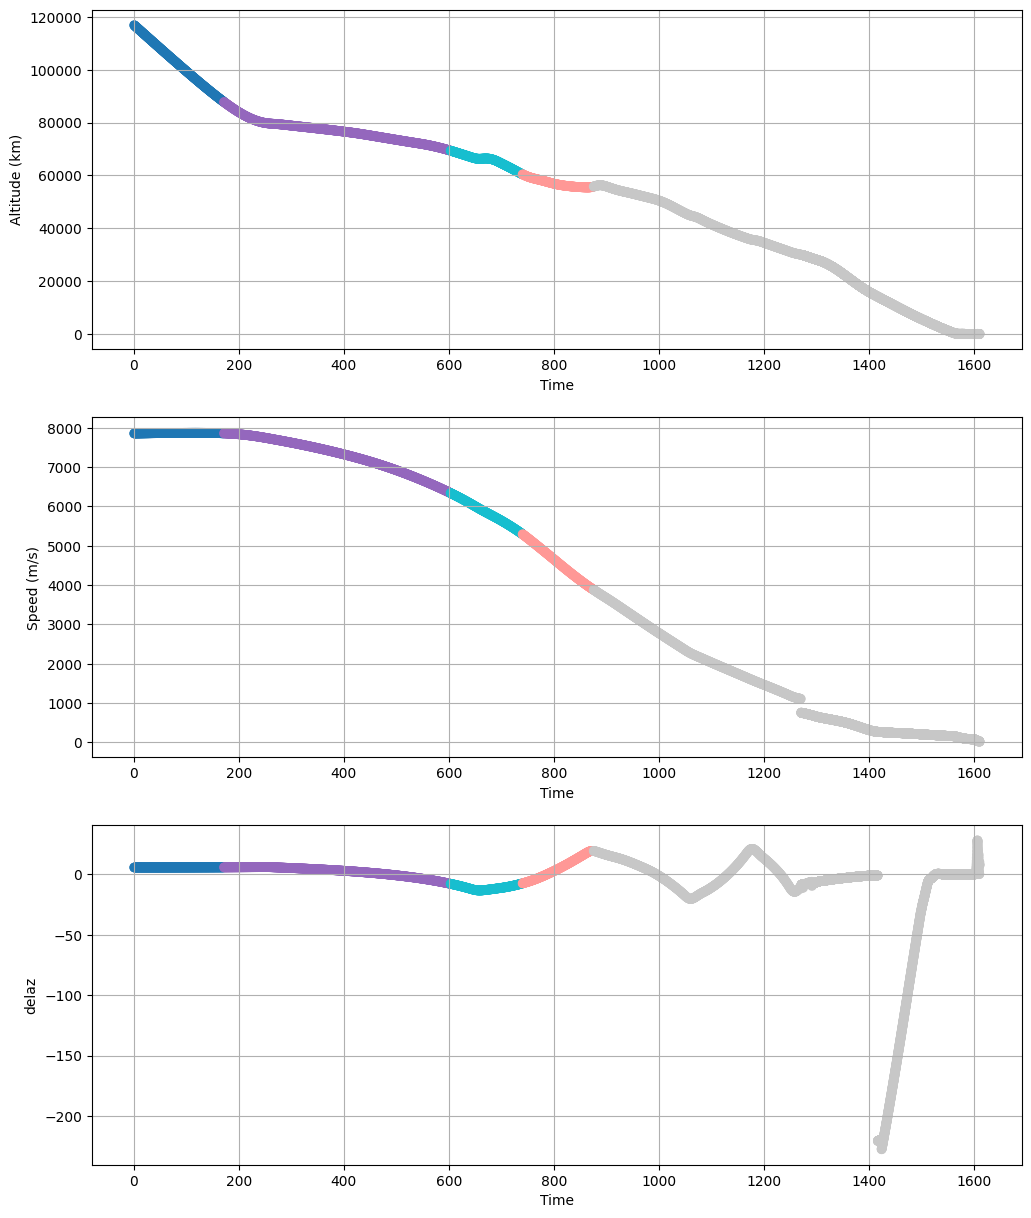

In [89]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5 * 3))

plt_ = ax[0]
plt1 = plt_.scatter(data['time'], data['rwy_alt'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    

plt_.set_xlabel('Time')
plt_.set_ylabel('Altitude (km)')
plt_.grid()
  


plt_ = ax[1]
plt2 = plt_.scatter(data['time'], data['surfv'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('Speed (m/s)')
plt_.grid()


plt_ = ax[2]
plt2 = plt_.scatter(data['time'], data['delaz'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
    
plt_.set_xlabel('Time')
plt_.set_ylabel('delaz')
plt_.grid()


Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Pitch °')

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'Roll °')

(-200.0, 150.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'hdot')

(0.0, 52.0)

Text(0.5, 0, 'surfv')

Text(0, 0.5, 'drag (ft/s)')

Text(0.5, 0, 'surfv (ft)')

Text(0, 0.5, 'mach')

(0.0, 28.0)

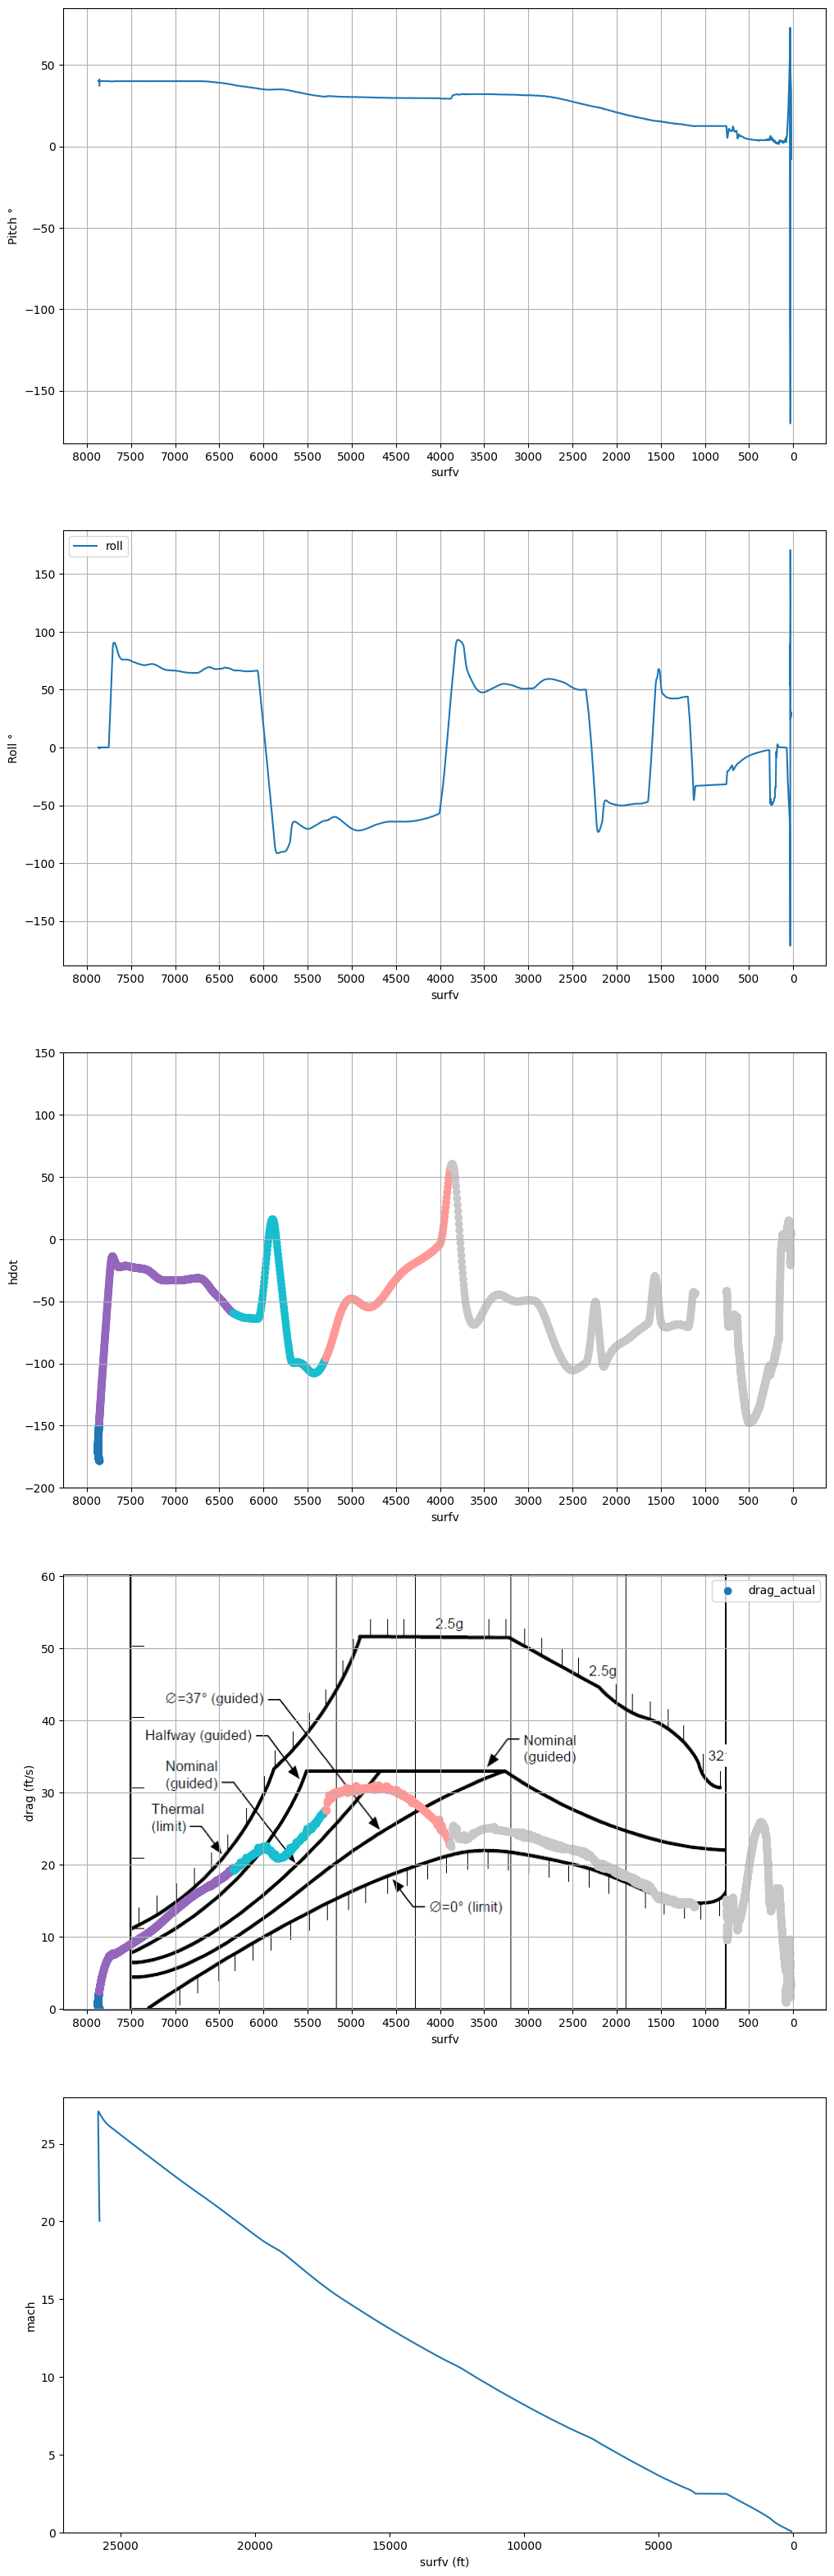

In [90]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(12, 8 * 5))

major_ticks = np.arange(0, 8500, 500)

plt_ = ax[0]
plt_.plot(data['surfv'], data['prog_pch'])
    
plt_.set_xlabel('surfv');
plt_.set_ylabel('Pitch °')

plt_.set_xticks(major_ticks);
plt_.grid();


plt_.invert_xaxis()

plt_ = ax[1]

plt1 = plt_.plot(data['surfv'], data['prog_roll'], label='roll');


    
plt_.set_xlabel('surfv')
plt_.set_ylabel('Roll °')
plt_.legend()

plt_.set_xticks(major_ticks);
plt_.grid();

plt_.invert_xaxis()


plt_ = ax[2]

plt1 = plt_.scatter(data['surfv'], data['hdot'], c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
 
plt_.set_ylim([-200, 150])

plt_.set_xlabel('surfv')
plt_.set_ylabel('hdot')
plt_.set_xticks(major_ticks)
plt_.grid()

plt_.invert_xaxis()


plt_ = ax[3]

img = plt.imread("drag2.png")
plt_.imshow(img, aspect='auto', extent=[7520, 762, -0.2, 60.2], alpha=1 , cmap='Greys_r')

plt1 = plt_.scatter(data['surfv'], data['drag'], label='drag_actual', c=data['guid_id'], cmap=guid_id_cmap, vmin=11, vmax=15)
  
plt.ylim([0, 52])

plt_.set_xlabel('surfv')
plt_.set_ylabel('drag (ft/s)')
plt_.legend()
plt_.set_xticks(major_ticks)
plt_.grid()


plt_ = ax[4]

plt1 = plt_.plot(data['surfv'] * 3.28084, data['mach'], )
 
plt_.set_xlabel('surfv (ft)')
plt_.set_ylabel('mach')

plt.ylim([0, 28])

plt_.invert_xaxis()